# Laboratorio: K-means con Sklearn

## Agrupar usuarios Twitter de acuerdo a su personalidad con K-means

<p>Para la práctica se utilizará de entradas un conjunto de datos que se obtuvo de un proyecto propio, en el que se analiza rasgos de la personalidad de usuarios de Twitter. Se ha filtrado a 140 “famosos” del mundo en diferentes áreas: deporte, cantantes, actores, etc. Basado en una metodología de psicología conocida como “Ocean: The Big Five” se tiene como características de entrada:</p>

<ul>
    <li>usuario (el nombre en Twitter)</li>
    <li>“op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte</li>
    <li>“co” = Conscientiousness – grado de orden, prolijidad, organización</li>
    <li>“ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social</li>
    <li>“ag” = Agreeableness – grado de empatía con los demás, temperamento</li>
    <li>“ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.</li>
    <li>Wordcount – Cantidad promedio de palabras usadas en sus tweets</li>
    <li>Categoria – Actividad laboral del usuario (actor, cantante, etc.)</li>
</ul>
        
<p>Se utilizará el algoritmo K-means para que agrupe estos usuarios -no por su actividad laboral- si no, por sus similitudes en la personalidad. Sólo utilizaremos 3 columna en este ejemplo, de modo que podamos ver en un gráfico tridimensional -y sus proyecciones a 2D- los grupos resultantes. Pero para casos reales, podemos utilizar todas las dimensiones que necesitemos. Una de las hipótesis que podríamos tener es: “Todos los cantantes tendrán personalidad parecida” (y así con cada rubro laboral). Pues veremos si lo probamos, o por el contrario, los grupos no están relacionados necesariamente con la actividad de estas Celebridades.</p>

In [1]:
#Importando las librerías que nos asistirán para ejecutar el algoritmo y graficar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
#Importar el archivo csv y vemos los primeros 5 registros del archivo tabulados.
dataframe = pd.read_csv("analisis.csv")
dataframe.head(5)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
#También podemos ver una tabla de información estadística que nos provee Pandas dataframe
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


<b>Pregunta 1: (30 puntos)</b> ¿Qué significa cada una de las estadísticas mostradas? Haga una pequeña explicación de cada una de ellas y utilice por cada una un valor como ejemplo para darle sentido a su explicación.

<b>Respuesta 1:</b>

<p>El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:</p>
<ol>
    <li>Actor/actriz</li>
    <li>Cantante</li>
    <li>Modelo</li>
    <li>Tv, series</li>
    <li>Radio</li>
    <li>Tecnología</li>
    <li>Deportes</li>
    <li>Politica</li>
    <li>Escritor</li>
</ol>

In [5]:
#Para conocer cuántos registros tenemos de cada ponemos las siguientes lineas
print(dataframe.groupby('categoria').size())

# Como vemos tenemos 34 cantantes, 27 actores, 17 deportistas, 16 políticos,etc

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


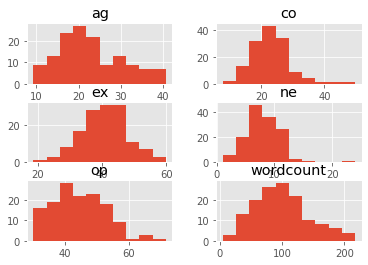

In [6]:
#Veremos graficamente nuestros datos para tener una idea de la dispersión de los mismos
dataframe.drop(['categoria'],1).hist()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


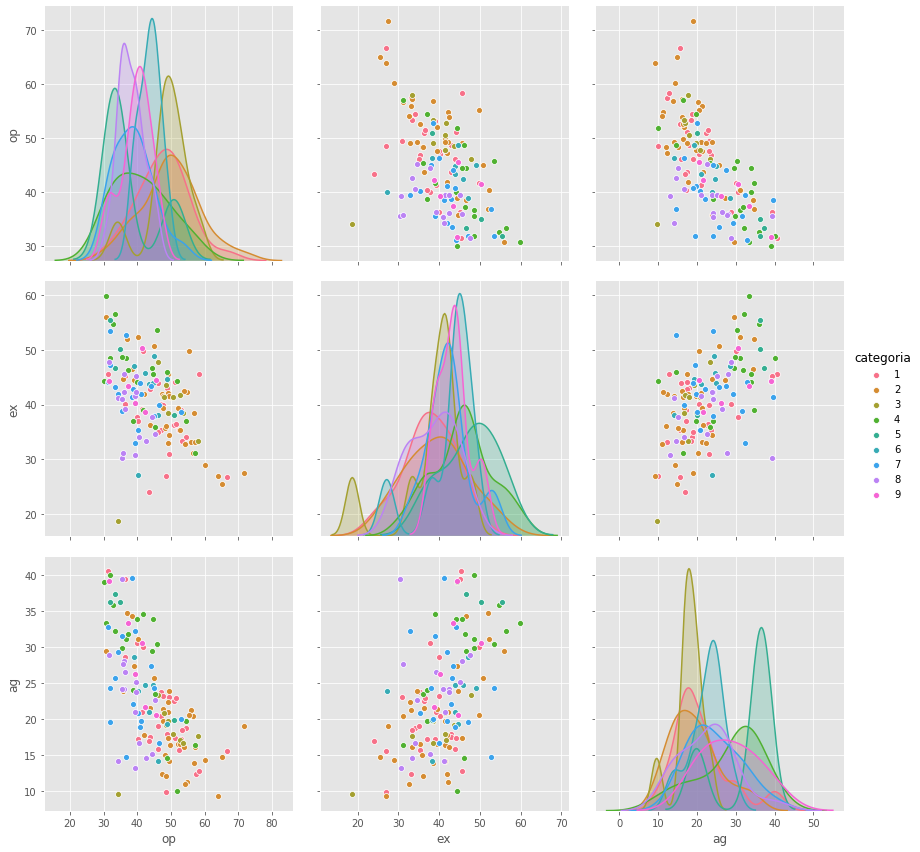

In [7]:
#En este caso seleccionamos 3 dimensiones: op, ex y ag 
#y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

#Revisando la gráfica no pareciera que haya algún tipo de agrupación o correlación entre los usuarios y sus categorías

In [8]:
#Definimos la entrada
#Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo.
#Sólo cargamos las columnas op, ex y ag en nuestra variable X.
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

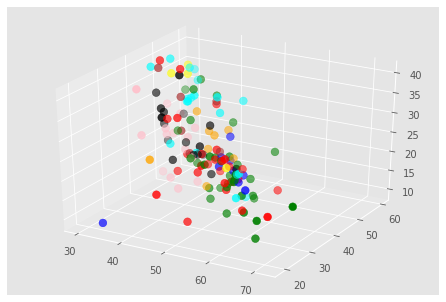

In [9]:
#Tenemos una gráfica en 3D con 9 colores representando las categorías.
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

#Veremos si con K-means, podemos “pintar” esta misma gráfica de otra manera, con clusters diferenciados.

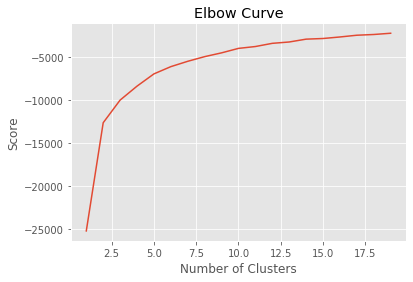

In [10]:
#Obtener el valor K
#Hallamos el valor de K haciendo una gráfica intentando hallar el “punto de codo”
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#En la siguiente referencia ver una explicación del Método del codo para la selección del número correcto de clusters k
# https://www.jacobsoft.com.mx/es_mx/k-means-clustering-con-python/

<p>Realmente la curva es bastante “suave”. Se considera a 5 como un buen número para K.</p>

<b>Pregunta 2: (20 puntos)</b> Según su criterio, ¿cuál tomarías y por qué?

<b>Respuesta 2:</b>

In [11]:
#Ejecutamos K-Means
#Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[34.42479832 48.2270434  34.58864788]
 [50.15530371 40.81295548 17.39048745]
 [39.76707053 44.34286061 25.36415225]
 [58.70462307 30.53566167 15.72207033]
 [42.66891482 33.31008136 21.11530482]]


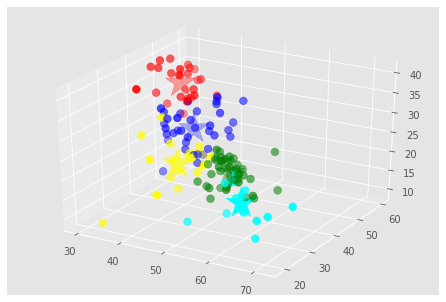

In [12]:
#Ahora se puede ver esto en una gráfica 3D con colores para los grupos y veremos si se diferencian:
# (las estrellas marcan el centro de cada cluster)

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores = ['red','green','blue','cyan','yellow']
asignar = []
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

#Podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad,
# teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.

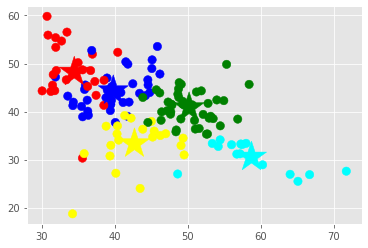

In [13]:
#Se tienen/generan 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D 
# para que nos ayude a visualizar los grupos y su clasificación

#GRAFICA 1
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

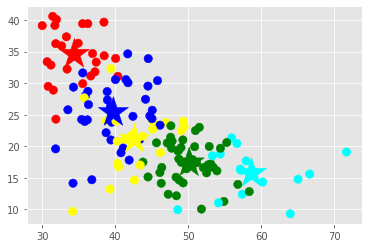

In [14]:
#GRAFICA 2
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

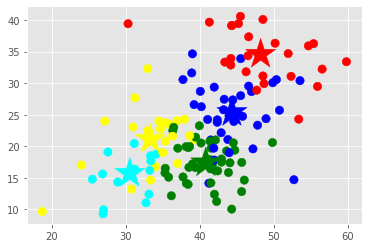

In [15]:
#GRAFICA 3
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

#Se puede observar que están bastante bien diferenciados los grupos.

In [16]:
#Ahora bien, podemos ver cada uno de los clusters cuántos usuarios tiene:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,25
1,green,42
2,blue,36
3,cyan,15
4,yellow,22


In [17]:
#De igual manera podemos ver la diversidad en rubros laborales de cada uno.
#Por ejemplo en el grupo 0 (rojo), vemos que hay de todas las actividades laborales aunque predominan
# de actividad 1 y 2 correspondiente a Actores y Cantantes con 11 y 15 famosos
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

#De categoría 3 “modelos” hay 6 sobre un total de 9.

,categoria,cantidad
0,0,NaN
1,1,2.0
2,2,4.0
3,3,NaN
4,4,9.0
5,5,3.0
6,6,NaN
7,7,3.0
8,8,2.0
9,9,2.0


In [18]:
#Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que
# tienen los rasgos de personalidad característicos que representan a cada cluster:

#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

#El resultado de la consulta muestra la posicion en el array de usuarios

array([ 35,  21, 107,  82,  91], dtype=int64)

In [19]:
#En este caso podemos ver que en los centros tenemos una modelo,
# un político, presentadora de Tv, locutor de Radio y un deportista.

users=dataframe['usuario'].values
for row in closest:
    print(users[row])

DaniMateoAgain
carmenelectra
Pablo_Iglesias_
JudgeJudy
kobebryant


In [20]:
#Clasificar nuevas muestras
#Finalmente podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos.
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta

new_labels = kmeans.predict(X_new)
print(new_labels)

#Vemos el ejemplo con el usuario de David Guetta y nos devuelve que pertenece al grupo 1 (verde).

[1]


## Conclusiones

<p>El algoritmo de Clustering K-means es uno de los más usados para encontrar grupos ocultos, o sospechados en teoría sobre un conjunto de datos no etiquetado. Esto puede servir para confirmar -o desterrar- alguna teoría que teníamos asumida de nuestros datos o negocio. Y también puede ayudarnos a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no hubiéramos reconocido. Una vez que el algoritmo ha ejecutado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.</p>

<p>Algunos casos de uso son:</p>
<ul>
    <li>Segmentación por Comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.</li>
    <li>Categorización de Inventario: agrupar productos por actividad en sus ventas</li>
    <li>Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal</li>
</ul>

<p>Atención: Puede haber casos en los que <b>no existan grupos naturales</b>, o clusters que contengan una verdadera razón de ser. Si bien K-means siempre nos brindará “k clusters”, quedará en nuestro criterio reconocer la utilidad de los mismos o bien revisar nuestras features y descartar las que no sirven o conseguir nuevas. También tener en cuenta que en este ejemplo estamos utilizando como medida de similitud entre features la distancia Euclideana pero podemos utilizar otras diversas funciones que podrían arrojar mejores resultados (como Manhattan, Lavenshtein, Mahalanobis, etc).</p>


<b>Pregunta 3: (50 puntos)</b> Escoja al menos 2 de las medidas de similitud antes mencionada, y haciendo uso de las implementaciones de las mismas en librería de Sklearn; muestre los resultados que se obtienen. Emita su criterio al respecto.